In [84]:
import numpy as np
import random
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## data for exploration

In [85]:
df = pd.DataFrame(np.random.randn(30, 2),
      index = pd.date_range('1/12/2020', periods=30),
      columns = ['A', 'B'])
df['big'] = 0
df.loc[df['A'] > 0.9, 'big'] = 1 #set some 'big' numbers class
df = df.reset_index()

In [86]:
df[-4:]

,index,A,B,big
26,2020-02-07,0.318208,-0.653741,0
27,2020-02-08,-1.684837,1.192206,0
28,2020-02-09,-0.539128,0.359552,0
29,2020-02-10,0.647277,1.460466,0


## Corr vs Cov

In [87]:
np.cov(df['A'], df['B']) #Estimate a covariance matrix, given data and weights.

array([[ 1.1154697 , -0.09306638],
       [-0.09306638,  0.60266766]])

In [ ]:
## covariance matrix element C_{ij} is the covariance of x_i and x_j

In [88]:
np.corrcoef(df['A'], df['B']) #Return Pearson product-moment correlation coefficients, normalized cov!

array([[ 1.        , -0.11350761],
       [-0.11350761,  1.        ]])

In [90]:
np.correlate(df['A'], df['B'])

array([-1.73929545])

## Exploration

In [91]:
df.describe()

,A,B,big
count,30.000000,30.000000,30.000000
mean,0.114512,0.279339,0.133333
std,1.056158,0.776317,0.345746
min,-2.545960,-1.278388,0.000000
25%,-0.374269,-0.286423,0.000000
50%,0.296485,0.395806,0.000000
75%,0.681140,0.787557,0.000000
max,2.887060,1.571294,1.000000


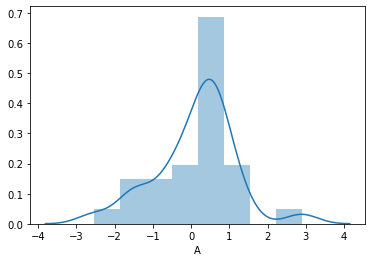

In [92]:
sns.distplot(df['A'])

### Skewness is a measure of the symmetry in a distribution. It measures the amount of probability in the tails. 
### The value is often compared to the kurtosis of the normal distribution, which is equal to 3. 
### If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails).

In [93]:
print("Skewness: %f" % df['A'].skew())
print("Kurtosis: %f" % df['A'].kurt())

Skewness: -0.268335
Kurtosis: 1.443013


(array([737437., 737441., 737445., 737449., 737453., 737456., 737460.,
        737464.]),
 <a list of 8 Text major ticklabel objects>)

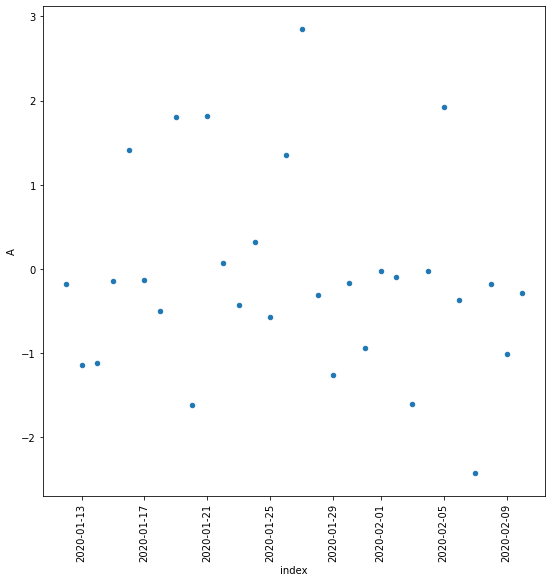

In [31]:
df.plot.scatter(x='index', y='A', figsize=(9,9))
plt.xticks(rotation=90)

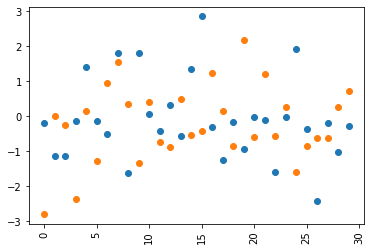

In [34]:
plt.scatter(x=df.index, y=df.A)
plt.scatter(x=df.index, y=df.B)
plt.xticks(rotation=90)
plt.show()

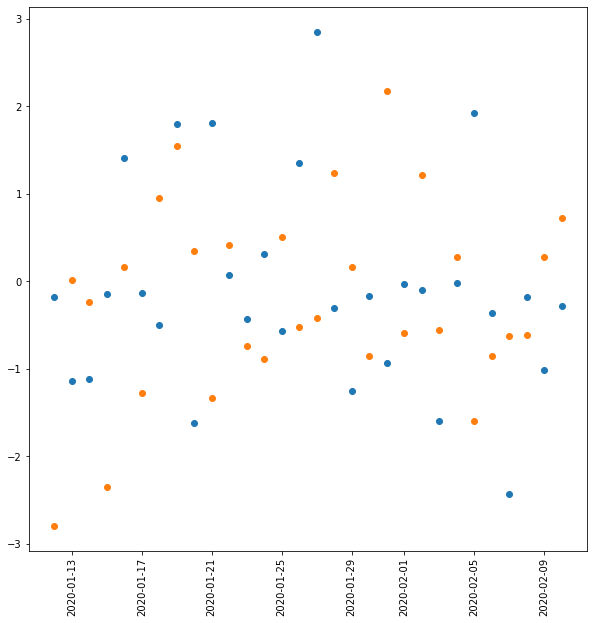

In [38]:
plt.rcParams["figure.figsize"] = (10,10) #set the size
plt.scatter(x=df['index'], y=df.A)
plt.scatter(x=df['index'], y=df.B)
plt.xticks(rotation=90)
plt.show()

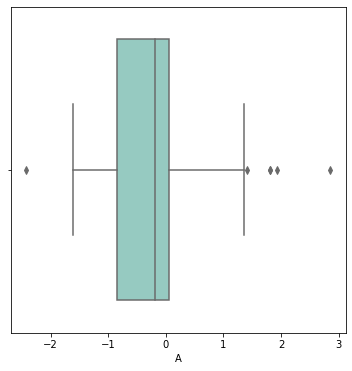

In [54]:
plt.rcParams["figure.figsize"] = (6,6)
sns.boxplot(x=df.A, palette="Set3")

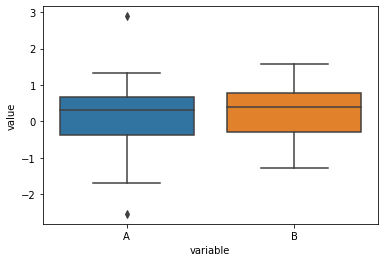

In [94]:
#sns.boxplot(y="A", data=df)
sns.boxplot(x="variable", y="value", data=pd.melt(df[['A','B']]))

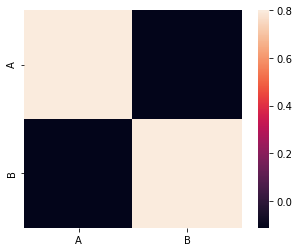

In [95]:
corrmat = df[['A','B']].corr()
sns.heatmap(corrmat, vmax=.8, square=True);